In [34]:
import configparser
import os
import pickle

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from decomp_pmi import VerbTensorEvaluator

In [7]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

Populating the interactive namespace from numpy and matplotlib


In [8]:
config = configparser.ConfigParser()
config.read('config.ini')
tensor_dir = os.path.join(config['DEFAULT']['ProjectDirectory'], 'tensor/')

In [46]:
evalor = VerbTensorEvaluator()

In [47]:
evalor.load_embeddings()

In [12]:
weight = 'log_freq'

In [13]:
subj = pd.Series(evalor.index['nsubj'])

In [14]:
obj = pd.Series(evalor.index['dobj'])

In [15]:
vocab = list(subj.index & obj.index)

/home/makrai/tool/python/vtensor/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  """Entry point for launching an IPython kernel.


In [16]:
subj_embed = evalor.decomped_tns.factors[0][np.array([subj.loc[w] for w in vocab])]

In [18]:
obj_embed = evalor.decomped_tns.factors[2][np.array([obj.loc[w] for w in vocab])]

In [19]:
regression = LinearRegression(n_jobs=-1)

In [20]:
regression.fit(subj_embed, obj_embed)

LinearRegression(n_jobs=-1)

In [21]:
diff = subj_embed.dot(regression.coef_)-obj_embed

In [22]:
diff_norm = np.apply_along_axis(np.linalg.norm, 1, diff)

In [48]:
[evalor.index['dobj'].inv[i] for i in np.argsort(-diff_norm)]

['what',
 'you',
 '-rrb-',
 'they',
 '-lrb-',
 'I',
 'use',
 'change',
 'more',
 'this',
 'it',
 'he',
 ',',
 'something',
 'post',
 'that',
 '``',
 'amount',
 'time',
 'we',
 'care',
 'answer',
 'service',
 'access',
 'information',
 'make',
 'run',
 'number',
 'discount',
 'start',
 'nothing',
 'way',
 'browser',
 'deal',
 'problem',
 'difference',
 'statement',
 'list',
 'be',
 'opportunity',
 'arm',
 'lot',
 'show',
 'she',
 'course',
 'video',
 'purchase',
 'attention',
 'help',
 'question',
 'thing',
 'share',
 'much',
 'option',
 'apartment',
 'address',
 'child',
 'view',
 'message',
 'money',
 'fun',
 'play',
 'link',
 'form',
 'the',
 'rate',
 'note',
 'gain',
 'look',
 'info',
 'love',
 'version',
 'work',
 'daughter',
 'life',
 'support',
 'part',
 '$',
 'job',
 'city',
 'increase',
 'all',
 'delivery',
 'C',
 'idea',
 'product',
 'one',
 'energy',
 'instruction',
 'industry',
 'engine',
 'people',
 'call',
 'study',
 'set',
 'gap',
 'power',
 'content',
 'tool',
 'peek',
 

In [37]:
df = pd.read_pickle('/mnt/permanent/home/makrai/project/verb-tensor/tensorly/dataframe/assoc.pkl')

In [43]:
df.loc['excellence'].head()

,,freq,freq_nsubj,freq_ROOT,freq_dobj,"freq_('nsubj', 'ROOT')","freq_('nsubj', 'dobj')","freq_('ROOT', 'dobj')",log_prob_freq_nsubj,log_prob_freq_ROOT,log_prob_freq_dobj,...,log_freq,log_prob,pmi,iact_info,npmi,niact,salience,iact_sali,log_dice,dice_sali
ROOT,dobj,,,,,,,,,,,,,,,,,,,,,
be,,1142,1548,83218086,669646856,1147,1529,79147939,-19.589965,-3.875761,-0.867329,...,10.157347,-20.028808,4.304247,0.783470,0.214903,0.039117,43.719731,7.957973,10.265832,104.273615
come,,114,1548,11658211,669646856,114,1529,11295570,-19.589965,-6.711311,-0.867329,...,6.832890,-23.353264,3.815341,0.803923,0.163375,0.034424,26.069805,5.493116,7.085465,48.414201
make,,68,1548,20215526,669646856,68,1529,6394960,-19.589965,-5.917194,-0.867329,...,6.087463,-24.098692,2.275796,0.000000,0.094437,0.000000,13.853826,0.000000,6.322030,38.485122
all,,40,1548,948439,669646856,40,1529,796156,-19.589965,-10.330959,-0.867329,...,5.321928,-24.864226,5.924027,0.597008,0.238255,0.024011,31.527244,3.177235,5.597361,29.788754
mean,,30,1548,4679475,669646856,30,1529,3463626,-19.589965,-8.028239,-0.867329,...,4.906891,-25.279264,3.206269,0.415449,0.126834,0.016434,15.732813,2.038561,5.174319,25.389819


In [44]:
df.loc[:,:,'excellence'].head()

freq  freq_nsubj  freq_ROOT  freq_dobj  \
nsubj     ROOT                                                
Australia deliver    8310       30185     916483      30133   
          achieve    2611   363011663     790446      30133   
          promote    1837   363011663     692545      30133   
          celebrate  1830   363011663     461117      30133   
          recognize  1120   363011663     450321      30133   

                     freq_('nsubj', 'ROOT')  freq_('nsubj', 'dobj')  \
nsubj     ROOT                                                        
Australia deliver                      8310                    8310   
          achieve                    566970                   18028   
          promote                    580855                   18028   
          celebrate                  304532                   18028   
          recognize                  177148                   18028   

                     freq_('ROOT', 'dobj')  log_prob_freq_nsubj  \
nsubj     ROOT                                                    
Australia deliver                     9137           -15.304610   
          achieve                     3038            -1.750714   
          promote                     2445            -1.750714   
          celebrate                   1843            -1.750714   
          recognize                   1802            -1.750714   

                     log_prob_freq_ROOT  log_prob_freq_dobj  ...   log_freq  \
nsubj     ROOT                                               ...              
Australia deliver            -10.380406          -15.307098  ...  13.020633   
          achieve            -10.593847          -15.307098  ...  11.350387   
          promote            -10.784606          -15.307098  ...  10.843136   
          celebrate          -11.371381          -15.307098  ...  10.837628   
          recognize          -11.405560          -15.307098  ...  10.129283   

                      log_prob        pmi  iact_info      npmi     niact  \
nsubj     ROOT                                                             
Australia deliver   -17.165522  23.826592   6.797943  1.388049  0.396023   
          achieve   -18.835768   8.815891   0.748734  0.468040  0.039751   
          promote   -19.343019   8.499399   1.168362  0.439404  0.060402   
          celebrate -19.348527   9.080666   0.421282  0.469321  0.021773   
          recognize -20.056871   8.406500   0.349711  0.419133  0.017436   

                       salience  iact_sali   log_dice   dice_sali  
nsubj     ROOT                                                     
Australia deliver    310.237308  88.513514  22.719231  295.818767  
          achieve    100.063772   8.498418  12.507992  141.970549  
          promote     92.160141  12.668707  12.001130  130.129880  
          celebrate   98.412882   4.565700  11.996540  130.014036  
          recognize   85.151822   3.542317  11.288238  114.341756  

[5 rows x 23 columns]

In [26]:
asymm = pd.Series(np.apply_along_axis(np.linalg.norm, 1, subj_embed - obj_embed),
                 index=vocab)

In [28]:
#asymm.drop(np.nan, inplace=True)

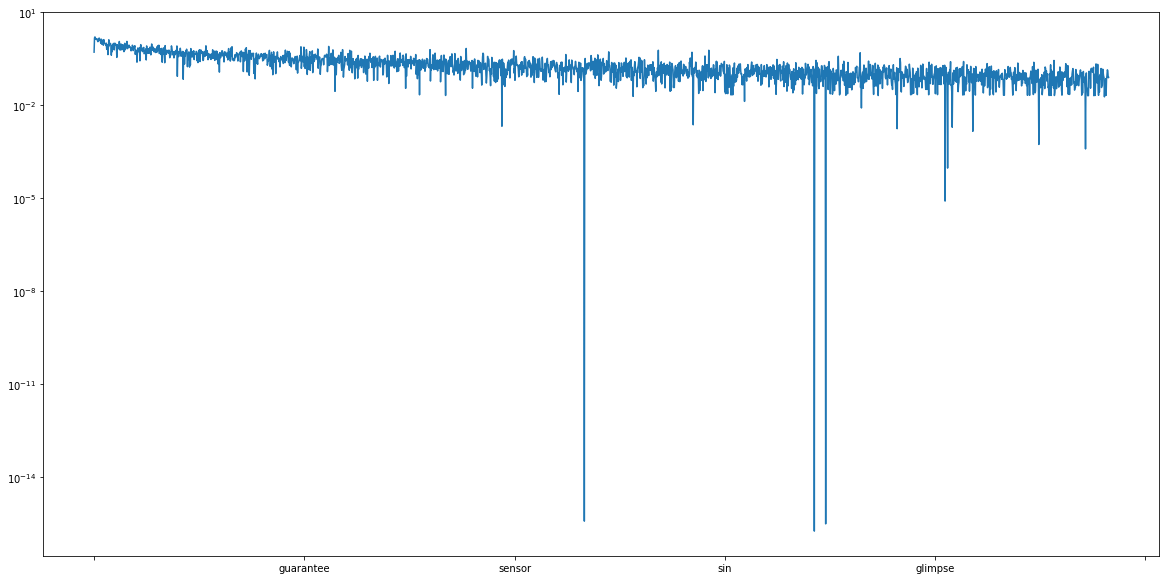

In [29]:
asymm.plot()#linewidth=1)
plt.yscale('log')

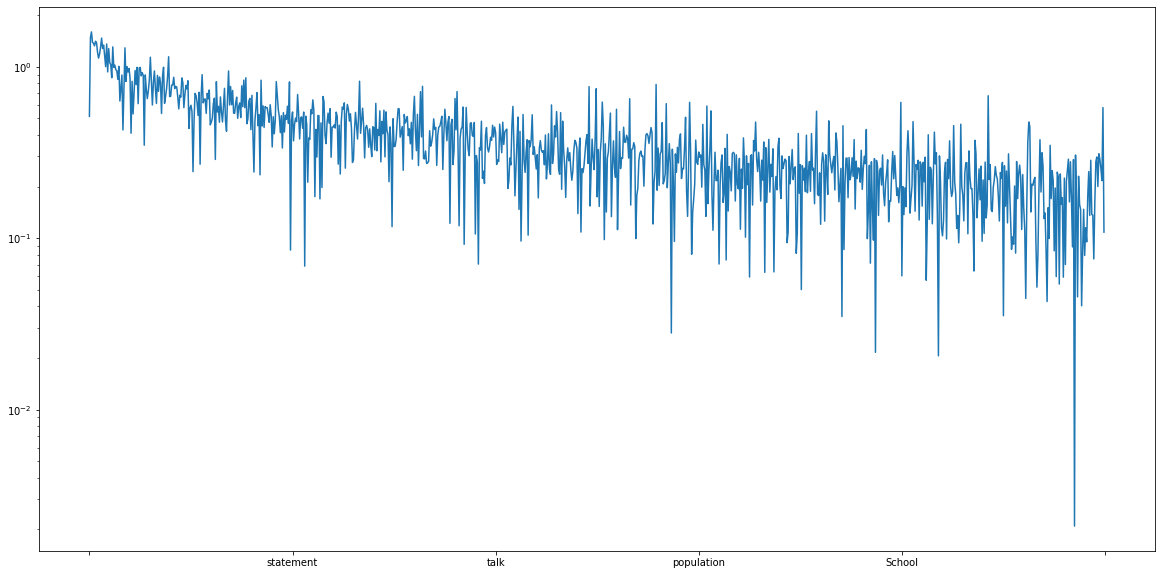

In [30]:
asymm.head(1000).plot()#linewidth=1)
plt.yscale('log')

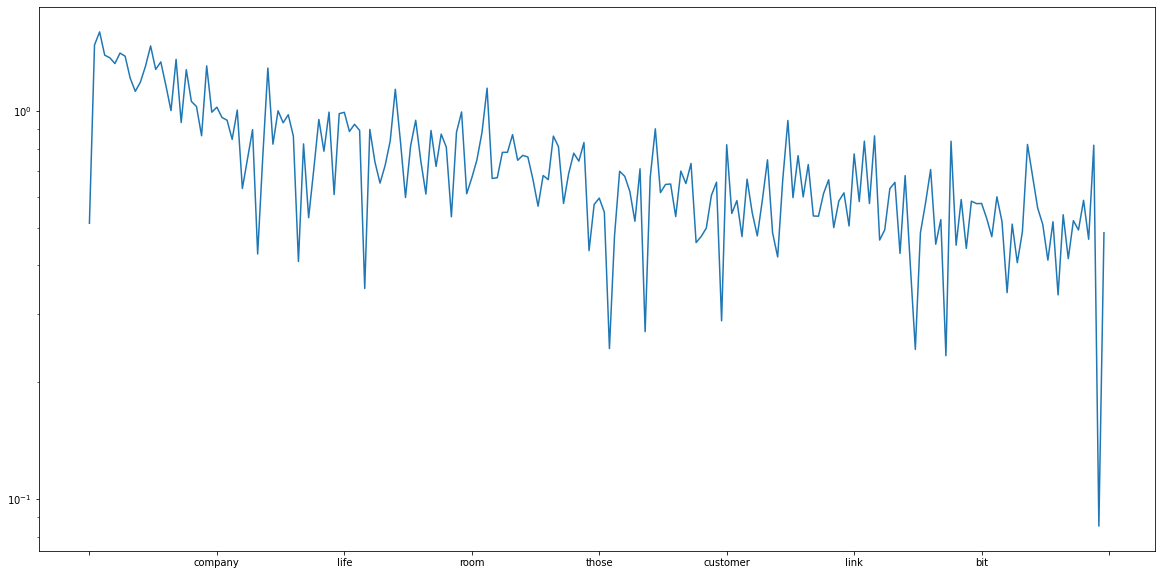

In [31]:
asymm.head(200).plot()#linewidth=1)
plt.yscale('log')

In [32]:
np.where(asymm>.5)

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          34,   35,   36,   37,   38,   39,   40,   42,   43,   44,   45,
          46,   47,   48,   49,   50,   51,   52,   53,   55,   56,   57,
          58,   59,   60,   61,   62,   63,   64,   65,   66,   67,   68,
          69,   70,   71,   72,   73,   74,   75,   76,   77,   78,   79,
          80,   81,   82,   83,   84,   85,   86,   87,   88,   89,   90,
          91,   92,   93,   94,   95,   96,   97,   99,  100,  101,  104,
         105,  106,  107,  108,  110,  111,  112,  113,  114,  115,  116,
         117,  118,  122,  123,  125,  126,  127,  129,  130,  132,  133,
         136,  137,  138,  139,  140,  141,  142,  143,  144,  145,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  157,  158,  160,
         164,  165,  167,  169,  171, 

In [191]:
asymm[132:142]

yourself       3.294126
role           3.572334
advantage      2.373896
who          121.197881
hour           3.466896
copy           1.787191
detail         2.881074
lead           1.816999
material       2.697781
myself         3.394174
dtype: float64

In [192]:
index['nsubj']['year']

137

In [193]:
index['nsubj']['place']

138

In [194]:
index['nsubj']['staff']

139

In [195]:
index['dobj']['year']

175

In [196]:
index['dobj']['place']

25

In [197]:
index['dobj']['staff']

560

In [198]:
asymm[138]

2.881074197661581

In [199]:
asymm.index[138]

'detail'